# Step 1: Import Necessary Libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_diabetes

# Step 2: Load the Diabetes Dataset

In [93]:
diabetes = load_diabetes()
df = pd.DataFrame(data= diabetes.data, columns= diabetes.feature_names)

df['target'] = diabetes.target

In [94]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Step 3: Prepare the Data

In [95]:
df.isnull().sum() # check for null values

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [96]:
X= df.iloc[:,:10]
y= (df.target >140).astype(int)  #target and changing it to binary 

In [97]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [98]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: target, dtype: int32

## Split the data into training and testing sets

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
y_train

17     1
66     1
137    1
245    0
31     0
      ..
106    0
270    1
348    1
435    0
102    1
Name: target, Length: 353, dtype: int32

# Step 4: Standardize Features
The code involves using the StandardScaler from scikit-learn to
standardize the features of the dataset. Standardization is a preprocessing
step that scales the features to have a mean of 0 and a standard deviation
of 1. This is important for algorithms like K-Nearest Neighbors (KNN) that
rely on distance measures because it ensures that all features contribute
equally to the distance computation.

▶ `fit`: Computes the mean and standard deviation (or any other statistics) of the X_train data.\
▶ `transform`: Uses the computed statistics (mean and standard deviation) to scale the data. \
`fit_transform(X_train)` → Computes mean and standard deviation on X_train and scales it.\
`transform(X_test)` → Uses the already computed mean and standard deviation (from X_train) to scale X_test. \
After the first fit_transform call, the scaler object "remembers" the mean and standard deviation. 
That's why we only use transform for X_test.

In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Choose the Value of K

In [102]:
k_value = 3

# Step 6: Create and Train the KNN Model

In [103]:
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

# Step 7: Make Predictions

In [104]:
y_pred = knn_model.predict(X_test_scaled)

# Step 8: Evaluate the Model

In [105]:
# Calculate accuracy 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy:.2f}') 
# Display classification report 
print('KNN Report:\n', classification_report(y_test, y_pred)) 

Accuracy: 0.70
KNN Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.72        49
           1       0.65      0.70      0.67        40

    accuracy                           0.70        89
   macro avg       0.70      0.70      0.70        89
weighted avg       0.70      0.70      0.70        89



# Step 9: Visualize Training Set Results:

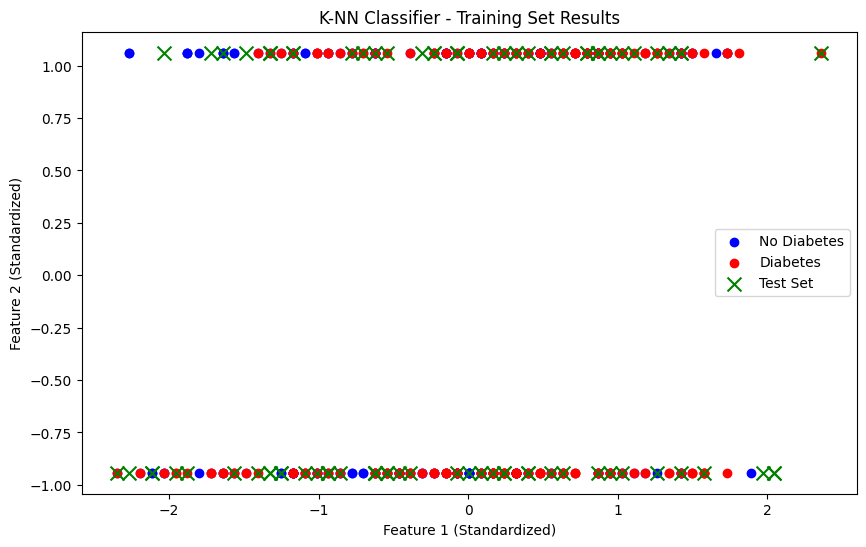

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], color='blue', label='No Diabetes')
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], color='red', label='Diabetes')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], color='green', label='Test Set', marker='x', s=100)
plt.title('K-NN Classifier - Training Set Results')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()

### Blue points represent instances without diabetes, red points represent instances with diabetes, and green 'x' markers represent the test set samples.